We  will be working with the Rossmann store and sales dataset which was used as part of a kaggle     
competition for the implemtation of the deep learning model. the link to the dataset is as follows;

# Source of dataset

!wget www.kaggle.com/c/rossmann-store-sales/data

In [1]:
import pandas as pd

In [2]:
# Data Importation

In [3]:
data = pd.read_csv("train.csv")
print("The Shape of the Dataset is :",data.shape)

The Shape of the Dataset is : (1017209, 9)


/home/jeremiah/anaconda32/envs/ai/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


From the above, we can see that we have a total of 1 million and 17 thousand, 209 observations with 9 columns

In [4]:
# Checking the first 5 rows of the whole dataset

In [5]:
data.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
store = pd.read_csv("store.csv")
print(" The Shape of the Dataset is :",store.shape)

 The Shape of the Dataset is : (1115, 10)


In [7]:
# Viewing the first 5 rows of dataset

In [8]:
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
# Merging the two dataset togther to have 1 dataframe.(pandas data structure)

In [10]:
c_data = data.merge(store,on=["Store"], how="inner")
print(c_data.shape)

(1017209, 18)


In [11]:
print("Unique number of Stores in the dataset is:", len(c_data["Store"].unique()))
print("Unique number of Days in the dataset is :", len(c_data["Date"].unique()))
print("Average daily sales of all stores available: ",round(c_data["Sales"].mean(),2))

Unique number of Stores in the dataset is: 1115
Unique number of Days in the dataset is : 942
Average daily sales of all stores available:  5773.82


In [12]:
# Checking the  Data Types of the dataset

In [13]:
c_data.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [14]:
# Time Intelligence

In [15]:
c_data["DayOfWeek"].value_counts() # Working with Time

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [16]:
# Using the date column and datetime module to extract all date related information 

In [17]:
import numpy as np
c_data['Date'] = pd.to_datetime(c_data['Date'], infer_datetime_format=True)
c_data["Month"] = c_data["Date"].dt.month
c_data["Quarter"] = c_data["Date"].dt.quarter
c_data["Year"] = c_data["Date"].dt.year
c_data["Day"] = c_data["Date"].dt.day
c_data["Week"] = c_data["Date"].dt.week
c_data["Season"] = np.where(c_data["Month"].isin([3,4,5]),"Spring",
                      np.where(c_data["Month"].isin([6,7,8]),"Summer",
                      np.where(c_data["Month"].isin([9,10,11]),"Fall",
                      np.where(c_data["Month"].isin([12,1,2]),"Winter","None"))))

/home/jeremiah/anaconda32/envs/ai/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


In [18]:
# Viewing the knewly added columns (featured engineering)

In [19]:
print(c_data[["Date","Year","Month","Day","Week","Quarter","Season"]].head())

        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


# Data Exploration 

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Viewing the distribution of the sales column using histogram

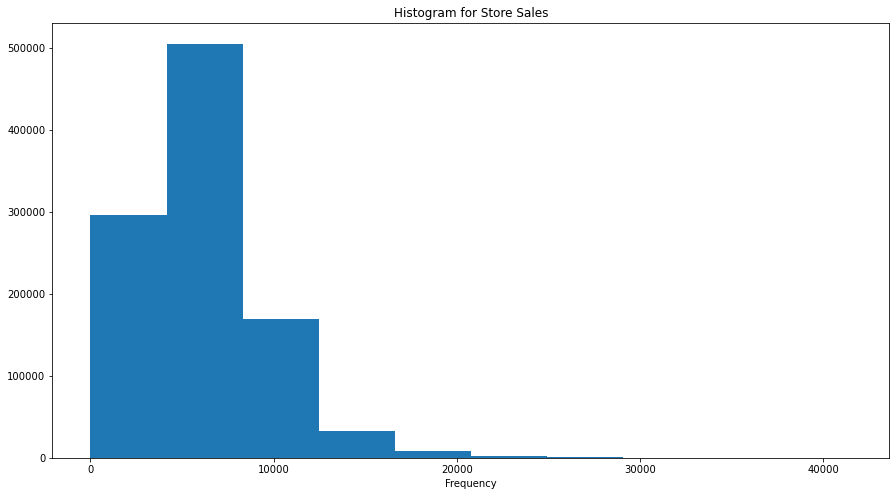

In [22]:
plt.figure(figsize=(15,8))
plt.hist(c_data["Sales"])
plt.title("Histogram for Store Sales")
plt.xlabel("Bins")
plt.xlabel("Frequency")
plt.show()

In [23]:
# Univariate Analysis(Numeric Columns)

In [24]:
# Plotting a histogram for all the numerical columns.

array([[<AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'DayOfWeek'}>,
        <AxesSubplot:title={'center':'Sales'}>,
        <AxesSubplot:title={'center':'Customers'}>],
       [<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'Promo'}>,
        <AxesSubplot:title={'center':'SchoolHoliday'}>,
        <AxesSubplot:title={'center':'CompetitionDistance'}>],
       [<AxesSubplot:title={'center':'CompetitionOpenSinceMonth'}>,
        <AxesSubplot:title={'center':'CompetitionOpenSinceYear'}>,
        <AxesSubplot:title={'center':'Promo2'}>,
        <AxesSubplot:title={'center':'Promo2SinceWeek'}>],
       [<AxesSubplot:title={'center':'Promo2SinceYear'}>,
        <AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Quarter'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Day'}>,
        <AxesSubplot:title={'center':'Week'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dty

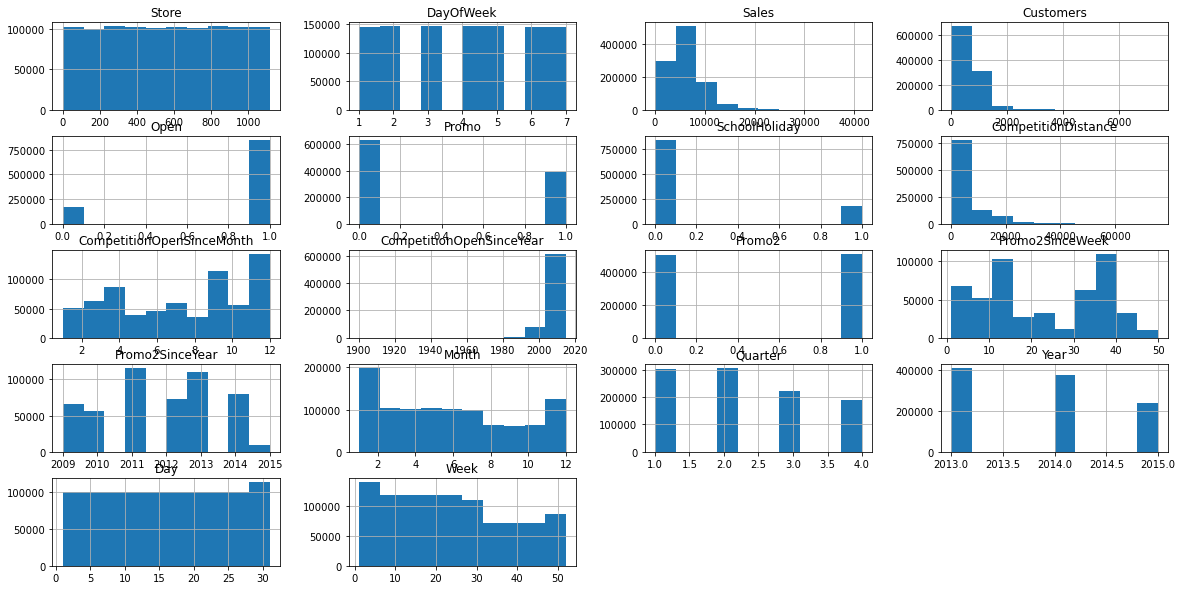

In [25]:
c_data.hist(figsize=(20,10))

In [26]:
# Checking percentages of null values in the combined dataset

In [27]:
c_data.isnull().sum()/c_data.shape[0] * 100

Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
Month                         0.000000
Quarter                       0.000000
Year                          0.000000
Day                           0.000000
Week                          0.000000
Season                        0.000000
dtype: float64

In [28]:
# We Replace the null values with the mode
# And Computing the percentage of null value present in the data set.

In [29]:
c_data["CompetitionDistance"]=c_data["CompetitionDistance"].fillna(c_data["CompetitionDistance"].mode()[0])


c_data["CompetitionDistance"].isnull().sum()/c_data.shape[0] * 100 

0.0

In [30]:
# Understanding the Categorical Features

In [31]:
import seaborn as sns  
sns.set(style="whitegrid")

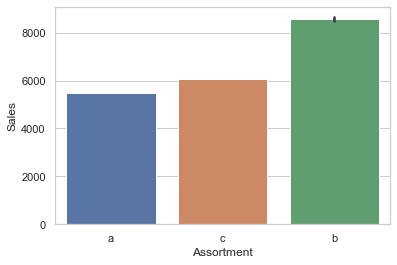

In [32]:
Assortmentsax = sns.barplot(x="Assortment", y="Sales", data=c_data) # A bar plot of Average Sales by Assortment

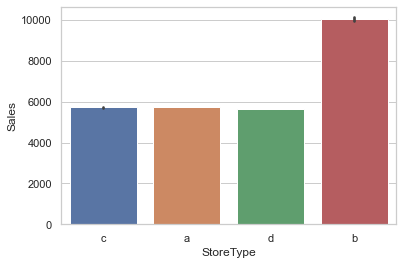

In [33]:
Typesax = sns.barplot(x="StoreType", y="Sales", data=c_data) # A bar plot for Average Sales by StoreType

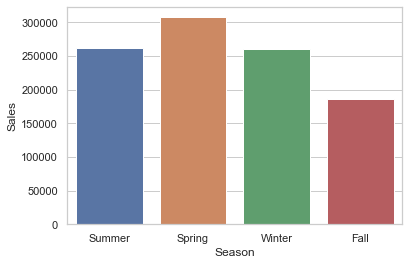

In [34]:
ax = sns.barplot(x="Season", y="Sales", data=c_data,estimator=np.size) # A bar plot for Average Sales by Season

In [35]:
# Fearture Engineering 

Recall that deep learning  models understand only numerical data,  
Therefore, all categorical features stored as text columns has to be   
converted using a one-hot encod for the model to apply the training data.  

In [36]:
#Define a variable for each type of feature
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

target = ["Sales"]

numeric_columns = ["Customers","Open","Promo","Promo2","StateHoliday","SchoolHoliday","CompetitionDistance"]

categorical_columns = ["DayOfWeek","Quarter","Month","Year","StoreType","Assortment","Season"]


# This function convert categoriacal columns to one-hot enconding 
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(c_data[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [37]:
# Applying the function on the columns of interest

In [38]:
temp = c_data[numeric_columns]

for column in categorical_columns:
    temp_df = create_ohe(c_data,column)
    temp = pd.concat([temp,temp_df],axis=1)

In [39]:
print("Shape of the new Data:",temp.shape)
print("Unique  Datatypes of the newdataset:",temp.dtypes.unique())

Shape of the new Data: (1017209, 44)
Unique  Datatypes of the newdataset: [dtype('int64') dtype('O') dtype('float64')]


In [40]:
print(temp.columns[temp.dtypes=="object"])

Index(['StateHoliday'], dtype='object')


In [41]:
temp["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [42]:
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)

temp.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

# Modelling Part

In [43]:
import numpy as np 
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(temp, c_data[target],test_size=0.2,random_state=2018)

x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1,random_state=2018)

In [45]:
#calculate the average score of the train dataset

In [46]:
mean_sales = y_train.mean()
print("The Average Sales is :",mean_sales)

The Average Sales is : Sales    5773.099997
dtype: float64


In [47]:
#Calculate the Mean Absolute Error on the test dataset

In [48]:
print("The MAE for Test Data is: ",abs(y_test - mean_sales).mean()[0])

The MAE for Test Data is:  2883.587604303215


# Guidelines to Follow with building a deep learning model.

 1: Start with small architectures.

 2: When small architectures (with two layers)
    fail, increase the size.

 3: When larger networks with two layers fail, go
    deeper.  

 4: When larger and deeper networks also fail, go
    even larger and even deeper. 
   

 5: When everything fails, revisit the data. 

In [49]:
# Designing the Deep Neural Network Architecture(sequential model)

In [50]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [51]:
# Model

In [52]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(1,activation = "linear"))

In [53]:
# Configuring the model

In [54]:
model.compile(optimizer='adam',loss="mean_absolute_error", metrics=["mean_absolute_error"])

In [55]:
#Train the model

In [56]:
model.fit(x_train.values,y_train.values, validation_data= (x_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
11444/11444 [==============================] - 12s 1ms/step - loss: 950.1122 - mean_absolute_error: 950.1122 - val_loss: 830.5090 - val_mean_absolute_error: 830.5090
Epoch 2/10
11444/11444 [==============================] - 12s 1ms/step - loss: 788.0390 - mean_absolute_error: 788.0390 - val_loss: 775.0178 - val_mean_absolute_error: 775.0178
Epoch 3/10
11444/11444 [==============================] - 12s 1ms/step - loss: 742.9883 - mean_absolute_error: 742.9883 - val_loss: 724.6970 - val_mean_absolute_error: 724.6970
Epoch 4/10
11444/11444 [==============================] - 13s 1ms/step - loss: 725.8807 - mean_absolute_error: 725.8807 - val_loss: 711.6331 - val_mean_absolute_error: 711.6331
Epoch 5/10
11444/11444 [==============================] - 13s 1ms/step - loss: 714.6355 - mean_absolute_error: 714.6355 - val_loss: 717.2173 - val_mean_absolute_error: 717.2173
Epoch 6/10
11444/11444 [==============================] - 12s 1ms/step - loss: 707.0183 - mean_absolute_error: 707.

In [57]:
# Checking the Model Performance with the testing dataset(using the model's evaluate method)

In [58]:
result = model.evaluate(x_test.values,y_test.values)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 7s 1ms/step - loss: 681.9406 - mean_absolute_error: 681.9406
Metric  loss : 681.94
Metric  mean_absolute_error : 681.94


In [59]:
# Comparing the Model Performance based on the Network size.

Improving the Model performace by adding more layers to our network. As discused in the theory of our presentation

In [60]:
model = Sequential()

model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
history = model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=10,batch_size=64)

# Outputing the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/10
11444/11444 [==============================] - 23s 2ms/step - loss: 1729443.5000 - mean_absolute_error: 851.5225 - val_loss: 1106472.6250 - val_mean_absolute_error: 714.6333
Epoch 2/10
11444/11444 [==============================] - 22s 2ms/step - loss: 1143034.3750 - mean_absolute_error: 716.4719 - val_loss: 1230274.5000 - val_mean_absolute_error: 739.7812
Epoch 3/10
11444/11444 [==============================] - 19s 2ms/step - loss: 1083898.6250 - mean_absolute_error: 697.3734 - val_loss: 1023314.4375 - val_mean_absolute_error: 686.8353
Epoch 4/10
11444/11444 [==============================] - 19s 2ms/step - loss: 1053609.2500 - mean_absolute_error: 688.1448 - val_loss: 1031664.1250 - val_mean_absolute_error: 688.8319
Epoch 5/10
11444/11444 [==============================] - 19s 2ms/step - loss: 1034060.8750 - mean_absolute_error: 681.9217 - val_loss: 1032187.3750 - val_mean_absolute_error: 685.0978
Epoch 6/10
11444/11444 [==============================] - 18s 2ms/step - lo

Again we the network deeper by adding more hidden layers with 200 neuronsnin each layer.

In [61]:
model = Sequential()
model.add(Dense(200,input_dim = 44,activation="relu"))
model.add(Dense(200,activation="relu"))
model.add(Dense(200,activation="relu"))
model.add(Dense(200,activation="relu"))
model.add(Dense(200,activation="relu"))
model.add(Dense(1,activation = "linear"))

In [62]:
 # compiling and fiting the data to the model for the training aspect

In [63]:
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val), epochs=15,batch_size=64)

Epoch 1/15
11444/11444 [==============================] - 33s 3ms/step - loss: 1671300.3750 - mean_absolute_error: 847.6323 - val_loss: 1276578.5000 - val_mean_absolute_error: 758.7444
Epoch 2/15
11444/11444 [==============================] - 33s 3ms/step - loss: 1170619.0000 - mean_absolute_error: 724.7571 - val_loss: 1168717.6250 - val_mean_absolute_error: 713.7767
Epoch 3/15
11444/11444 [==============================] - 33s 3ms/step - loss: 1096296.5000 - mean_absolute_error: 700.1171 - val_loss: 1087990.7500 - val_mean_absolute_error: 695.1469
Epoch 4/15
11444/11444 [==============================] - 33s 3ms/step - loss: 1060033.0000 - mean_absolute_error: 689.3956 - val_loss: 984564.1250 - val_mean_absolute_error: 674.1551
Epoch 5/15
11444/11444 [==============================] - 34s 3ms/step - loss: 1035596.8750 - mean_absolute_error: 681.7233 - val_loss: 1019285.8750 - val_mean_absolute_error: 671.9108
Epoch 6/15
11444/11444 [==============================] - 34s 3ms/step - los

In [64]:
# Outputing the results

In [65]:
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 5s 804us/step - loss: 821465.0000 - mean_absolute_error: 606.9346
Metric  loss : 821465.0
Metric  mean_absolute_error : 606.93


# Improving Performance by of the model by increasing the neurons number in each layer of the network.

In [66]:
model = Sequential()
model.add(Dense(400,input_dim = 44,activation="relu"))
model.add(Dense(400,activation="relu"))
model.add(Dense(1, activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error", metrics=["mean_absolute_error"])

In [67]:
# Training the network with the traning data

In [68]:
model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64)

Epoch 1/15
11444/11444 [==============================] - 30s 3ms/step - loss: 1649744.3750 - mean_absolute_error: 842.2195 - val_loss: 1361478.8750 - val_mean_absolute_error: 815.0551
Epoch 2/15
11444/11444 [==============================] - 29s 2ms/step - loss: 1164585.5000 - mean_absolute_error: 727.8109 - val_loss: 1078920.5000 - val_mean_absolute_error: 703.0526
Epoch 3/15
11444/11444 [==============================] - 31s 3ms/step - loss: 1104153.5000 - mean_absolute_error: 709.5686 - val_loss: 1002876.3125 - val_mean_absolute_error: 688.2271
Epoch 4/15
11444/11444 [==============================] - 30s 3ms/step - loss: 1060217.2500 - mean_absolute_error: 693.6401 - val_loss: 1023715.0000 - val_mean_absolute_error: 697.4832
Epoch 5/15
11444/11444 [==============================] - 30s 3ms/step - loss: 1032031.0625 - mean_absolute_error: 683.5731 - val_loss: 986527.1875 - val_mean_absolute_error: 673.4246
Epoch 6/15
11444/11444 [==============================] - 29s 3ms/step - los

In [69]:
# Evaluating with the test data and outputing the results

In [70]:
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 5s 791us/step - loss: 860003.5000 - mean_absolute_error: 623.5370
Metric  loss : 860003.5
Metric  mean_absolute_error : 623.54


Adding more layers to inprove the netwolrk accuracy  and using   
call backs parameter to record the history of various metric during the training .

In [71]:
from keras.callbacks import History
history = History()
model = Sequential()
model.add(Dense(400,input_dim = 44,activation="relu"))
model.add(Dense(400,activation="relu"))
model.add(Dense(400,activation="relu"))
model.add(Dense(400,activation="relu"))
model.add(Dense(400,activation="relu"))
model.add(Dense(1,activation = "linear"))

In [72]:
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])

model.fit(x_train,y_train, validation_data=(x_val,y_val),epochs=15,batch_size=64,callbacks=[history])

Epoch 1/15
11444/11444 [==============================] - 71s 6ms/step - loss: 1655987.0000 - mean_absolute_error: 845.7874 - val_loss: 1159237.2500 - val_mean_absolute_error: 717.9360
Epoch 2/15
11444/11444 [==============================] - 74s 6ms/step - loss: 1175940.5000 - mean_absolute_error: 725.8435 - val_loss: 1113910.2500 - val_mean_absolute_error: 727.0017
Epoch 3/15
11444/11444 [==============================] - 74s 6ms/step - loss: 1110903.6250 - mean_absolute_error: 704.3981 - val_loss: 1103776.7500 - val_mean_absolute_error: 721.4929
Epoch 4/15
11444/11444 [==============================] - 80s 7ms/step - loss: 1066918.5000 - mean_absolute_error: 690.7486 - val_loss: 1128845.1250 - val_mean_absolute_error: 710.2573
Epoch 5/15
11444/11444 [==============================] - 77s 7ms/step - loss: 1044706.6250 - mean_absolute_error: 684.1591 - val_loss: 953359.1875 - val_mean_absolute_error: 658.1061
Epoch 6/15
11444/11444 [==============================] - 73s 6ms/step - los

In [73]:
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 14s 2ms/step - loss: 943205.1250 - mean_absolute_error: 659.5919
Metric  loss : 943205.12
Metric  mean_absolute_error : 659.59


In [74]:
# We then  plot the Loss metric accross the Epochs

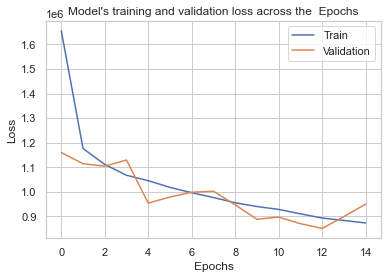

In [75]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's training and validation loss across the  Epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Exercise for the Student to Interpret the above graph below